# Validating NN Model

Using validation curves to validate the model performance 

In [1]:
import activation_functions
import loss_functions
import process_MNIST
from init_NN_val import NeuralNetwork
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

#local path to files 
training_images_path =  'training_data/train-images.idx3-ubyte'
training_labels_path =  'training_data/train-labels.idx1-ubyte'
test_images_path = 'test_data/t10k-images.idx3-ubyte'
test_labels_path =  'test_data/t10k-labels.idx1-ubyte'


#Loads MNIST data files. Assumes unzipped idx files avilable at: http://yann.lecun.com/exdb/mnist/
training_images, training_labels = process_MNIST.load_data(training_images_path, training_labels_path)
test_images, test_labels = process_MNIST.load_data(test_images_path, test_labels_path)

Testing Model with Learning Rate 0.01 using Gradient Descent

In [2]:
lsize = [784, 128, 64, 10] #e.g. this structure will have 3 linear activation functions and 2 ReLU fcns
lr = 0.01

nn_lr01_gd = NeuralNetwork(lsize, activation_functions.ReLU, activation_functions.dReLU, loss_functions.cross_entropy_w_softmax, loss_functions.dcross_entropy, lr)
losses = nn_lr01_gd.train(training_images, training_labels, epochs = 10, batch_size=len(training_images)) #, debug=True)
nn_lr01_gd_cross_ent_error, nn_lr001_gd_classification_error = nn_lr01_gd.test(test_images, test_labels)

 10%|█         | 1/10 [00:42<06:23, 42.57s/it]

epoch loss:  662.3402326496955


 20%|██        | 2/10 [01:24<05:36, 42.12s/it]

epoch loss:  452.4975956559437


 30%|███       | 3/10 [02:03<04:44, 40.64s/it]

epoch loss:  329.9688767131993


 40%|████      | 4/10 [02:45<04:07, 41.25s/it]

epoch loss:  259.81943272802823


 50%|█████     | 5/10 [03:24<03:22, 40.52s/it]

epoch loss:  216.44038421761405


 60%|██████    | 6/10 [04:04<02:41, 40.37s/it]

epoch loss:  188.84682883996632


 70%|███████   | 7/10 [04:49<02:05, 41.86s/it]

epoch loss:  171.15546479380103


 80%|████████  | 8/10 [05:29<01:22, 41.07s/it]

epoch loss:  156.62913888210463


 90%|█████████ | 9/10 [06:05<00:39, 39.53s/it]

epoch loss:  144.41112325724677


100%|██████████| 10/10 [06:42<00:00, 40.23s/it]


epoch loss:  133.9916173822424
Average cross entropy loss: 123.34667441418152
Classification accuracy: 31.86%


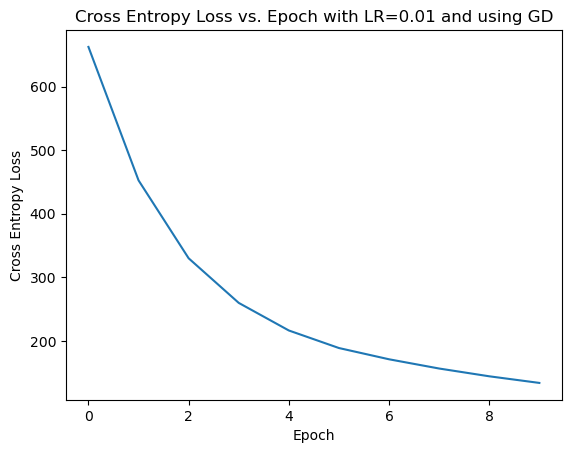

In [3]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Loss vs. Epoch with LR=0.01 and using GD')
plt.show()

In [4]:
error_summary = stats.describe(nn_lr01_gd_cross_ent_error)
print("mean: ", np.mean(nn_lr01_gd_cross_ent_error))
print("median: ", np.median(nn_lr01_gd_cross_ent_error))
print("min: ", np.min(nn_lr01_gd_cross_ent_error))
print("max: ", np.max(nn_lr01_gd_cross_ent_error))
print("variance: ", error_summary.variance)
print("skewness: ", error_summary.skewness)
print("kurtosis: ", error_summary.kurtosis)
print("quartile: ", np.percentile(nn_lr01_gd_cross_ent_error, q=[10, 25, 50, 75, 90]))

mean:  123.34667441418152
median:  79.50422996932659
min:  -0.0
max:  1168.880678821089
variance:  20048.00705746913
skewness:  1.3813201882252897
kurtosis:  2.2457384291973383
quartile:  [-0.00000000e+00  8.32667268e-15  7.95042300e+01  2.02172065e+02
  3.23662427e+02]


In [5]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.utils.data import Dataset
import process_MNIST
from init_Pytorch_NN import FeedForwardNN

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

batch_size = len(training_data)

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


#Define NN architecture. Input size (first layer) and output size (last layer) can't change.
#Will have linear activation functions between each layer, and ReLU activation functions after 
#each linear activation function except between last hidden layer and output layer. 
# lsize = [784, 128, 64, 10] #e.g. this structure will have 3 linear activation functions and 2 ReLU fcns
input_size = 784  # Example: 28x28 pixels for MNIST dataset
hidden_size = [128, 64]
num_classes = 10  # Example: Number of classes for MNIST dataset
learning_rate = 0.01
num_epochs = 10

#initialize NN 
# nn = NeuralNetwork(lsize, activation_functions.ReLU, activation_functions.dReLU, loss_functions.cross_entropy_w_softmax, loss_functions.dcross_entropy)
model = FeedForwardNN(input_size, hidden_size, num_classes)

##train NN (example uses mini-batch)
# nn.train(training_images, training_labels, epochs = 10, batch_size=1)
# model.train(num_epochs, batch_size=1, learning_rate=learning_rate,  training_data=training_data)
model.train(num_epochs, input_size=input_size, learning_rate=learning_rate,  train_dataloader=train_dataloader)
#gradient descent means batch size = # training samples (# steps you take = # epochs)
#stochastic gradient descent means batch size = 1


1it [00:05,  5.26s/it][00:00<?, ?it/s]
 10%|█         | 1/10 [00:05<00:47,  5.27s/it]

batch loss:  [2.3054637908935547]
epoch loss:  2.3054637908935547


1it [00:05,  5.13s/it]
 20%|██        | 2/10 [00:10<00:41,  5.19s/it]

batch loss:  [2.305192232131958]
epoch loss:  2.305192232131958


1it [00:05,  5.11s/it]
 30%|███       | 3/10 [00:15<00:36,  5.16s/it]

batch loss:  [2.3049211502075195]
epoch loss:  2.3049211502075195


1it [00:05,  5.07s/it]
 40%|████      | 4/10 [00:20<00:30,  5.13s/it]

batch loss:  [2.3046505451202393]
epoch loss:  2.3046505451202393


1it [00:05,  5.13s/it]
 50%|█████     | 5/10 [00:25<00:25,  5.13s/it]

batch loss:  [2.30437970161438]
epoch loss:  2.30437970161438


1it [00:05,  5.18s/it]
 60%|██████    | 6/10 [00:30<00:20,  5.15s/it]

batch loss:  [2.304110050201416]
epoch loss:  2.304110050201416


1it [00:05,  5.08s/it]
 70%|███████   | 7/10 [00:36<00:15,  5.13s/it]

batch loss:  [2.303840398788452]
epoch loss:  2.303840398788452


1it [00:05,  5.13s/it]
 80%|████████  | 8/10 [00:41<00:10,  5.13s/it]

batch loss:  [2.3035717010498047]
epoch loss:  2.3035717010498047


1it [00:05,  5.92s/it]
 90%|█████████ | 9/10 [00:47<00:05,  5.38s/it]

batch loss:  [2.303302764892578]
epoch loss:  2.303302764892578


1it [00:05,  5.93s/it]
100%|██████████| 10/10 [00:53<00:00,  5.30s/it]

batch loss:  [2.303034782409668]
epoch loss:  2.303034782409668
Training complete.


[2.3054637908935547,
 2.305192232131958,
 2.3049211502075195,
 2.3046505451202393,
 2.30437970161438,
 2.304110050201416,
 2.303840398788452,
 2.3035717010498047,
 2.303302764892578,
 2.303034782409668]

In [6]:

##test NN
# cross_ent_error, classification_error = nn.test(test_images, test_labels)
cross_ent_errors, classification_matches = model.test(test_dataloader, input_size=input_size)
classification_matches_fixed = [x[0] for x in classification_matches]

print('Average cross entropy loss:', np.mean(cross_ent_errors))
print(f"Classification accuracy: {(sum(classification_matches_fixed)/test_data.test_labels.size(0))*100}%")

Average cross entropy loss: 2.3025038
Classification accuracy: 8.77%


C:\Users\pcher\AppData\Roaming\Python\Python310\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [7]:
error_summary = stats.describe(cross_ent_errors)
print("mean: ", np.mean(cross_ent_errors))
print("median: ", np.median(cross_ent_errors))
print("min: ", np.min(cross_ent_errors))
print("max: ", np.max(cross_ent_errors))
print("variance: ", error_summary.variance)
print("skewness: ", error_summary.skewness)
print("kurtosis: ", error_summary.kurtosis)
print("quartile: ", np.percentile(cross_ent_errors, q=[10, 25, 50, 75, 90]))

mean:  2.3025038
median:  2.3025038
min:  2.3025038
max:  2.3025038
variance:  nan
skewness:  nan
kurtosis:  nan
quartile:  [2.30250382 2.30250382 2.30250382 2.30250382 2.30250382]


C:\Users\pcher\AppData\Local\Temp\ipykernel_33500\44925478.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  error_summary = stats.describe(cross_ent_errors)
c:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1522: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sk = skew(a, axis, bias=bias)
c:\ProgramData\anaconda3\lib\site-packa